# Notebook para treinamento de modelo Machine Learning
## MVP Puc Rio - Lucas Rodrigues de Castro


### Descrição do projeto
Para o MPV foi escolhido utilizar um dataset com dados de processos de recrutamento para a predição se o candidato será ou não contratado.

As informações do Dataset podem ser encontradas no repositório do Kaggle, com as referencias de sua autoria e especificações. O Link a seguir é do dataset original.

Para finalidade do projeto o dataset foi copiado integralmente e sem alteração, armazenado em um repositório do github, pra facilitar a avaliação necessária. Qualquer outro uso deverá seguir as especificações do repositório original bem como mencionar a autoria de Rabie El Kharoua.

O dataset original foi gerado para fins didáticos.

https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data

In [23]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carregamento do Dataset

Utilizando um repositório do github que armazena o dataset , lemos o arquivo e cargamos em uma variável `dataset`.

É feito uma leitura das primeiras linhas para simples conferência do carregamento dos dados.

As especificações das colunas de acordo com o Dataset original são:

- Age  
Description: Age of the candidate.  
Data Range: 20 to 50 years.  
Data Type: Integer.  

- Gender  
Description: Gender of the candidate.  
Categories: Male (0) or Female (1).  
Data Type: Binary.  

- Education Level  
Description: Highest level of education attained by the candidate.  
Categories:  
1: Bachelor's (Type 1)  
2: Bachelor's (Type 2)  
3: Master's  
4: PhD  
Data Type: Categorical.  

- Experience Years  
Description: Number of years of professional experience.  
Data Range: 0 to 15 years.  
Data Type: Integer.  

- Previous Companies Worked  
Description: Number of previous companies where the candidate has worked.  
Data Range: 1 to 5 companies.  
Data Type: Integer.  

- Distance From Company  
Description: Distance in kilometers from the candidate's residence to the hiring company.  
Data Range: 1 to 50 kilometers.  
Data Type: Float (continuous).  

- Interview Score  
Description: Score achieved by the candidate in the interview process.  
Data Range: 0 to 100.  
Data Type: Integer.  

- Skill Score  
Description: Assessment score of the candidate's technical skills.  
Data Range: 0 to 100.  
Data Type: Integer.  

- Personality Score  
Description: Evaluation score of the candidate's personality traits.  
Data Range: 0 to 100.  
Data Type: Integer.  

- Recruitment Strategy  
Description: Strategy adopted by the hiring team for recruitment.  
Categories:  
1: Aggressive  
2: Moderate  
3: Conservative  
Data Type: Categorical.  

- Hiring Decision (Target Variable)  
Description: Outcome of the hiring decision.  
Categories:  
0: Not hired  
1: Hired  
Data Type: Binary (Integer).  

### Dataset Information
- Records: 1500
- Features: 10
- Target Variable: HiringDecision (Binary)



In [ ]:
# Carga do Dataset
# dataset original utilizado https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data

# Informa a URL de importação do dataset de um repositório GitHub
url = "https://raw.githubusercontent.com/lucas-rodrigues0/dataset_recruitment_data/main/recruitment_data.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


### Exibe informações sobre o dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


## Golden Dataset e Holdout

Faz duas separaçóes do dataset. A primeira separa 20% do dataset para simular um Golden Dataset que será utilizado no sistema back-end. Do restante é feita nova separação para a utilização no treino do modelo e parte para o teste posterior ao treinamento.

É utilizado 20% do dataset para o holdout de teste.  
O holdout é feito com a estratificação para garantir a proporcionalidade dos dados tanto no teste como no treinamento.

In [ ]:
# Separação de parte do dataset para compor um Golden dataset para o back-end
# e a outra parte novamente separada para o holdout

test_size = 0.2
seed = 7

arr = dataset.values
X = arr[:,0:10]
y = arr[:,10]

# Separa em Dataset e Golden Dataset
X_dataset, X_golden, y_dataset, y_golden = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

X_golden_df = pd.DataFrame(X_golden, columns=dataset.columns[:-1])
y_golden_df = pd.DataFrame(y_golden, columns=[dataset.columns[-1]])

golden_df = X_golden_df.join(y_golden_df)
golden_df.to_csv("./golden_dataset_hr_recruitment.csv", index=False)

# Separa o holdout
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=test_size, shuffle=True, random_state=seed, stratify=y_dataset)

scoring = 'accuracy'
num_partitions = 10

kfold = StratifiedKFold(n_splits=num_partitions, shuffle=True, random_state=seed)

In [ ]:
# Verifica a quantidade de entradas nas separações

print(len(golden_df), "- Golden Dataset")
print(len(X_dataset), "- Dataset para modelo")
print(len(X_train), "- parte para treino do modelo")
print(len(X_test), "- parte para teste do modelo")


300 - Golden Dataset
1200 - Dataset para modelo
960 - parte para treino do modelo
240 - parte para teste do modelo


## Modelos linha de base

Cria modelos em uma linha base para fazer uma primeira avaliação dos possíveis modelos de classificação.  


Ao final da célula temos os melhores resultados para:
- BaggingClassifier
- RandomForestClassifier
- GradientBoostingClassifier


LR: 0.863542 (0.030352)
KNN: 0.686458 (0.035001)
CART: 0.869792 (0.032692)
NB: 0.871875 (0.026373)
SVM: 0.696875 (0.017708)
Bagging: 0.917708 (0.022073)
RF: 0.912500 (0.029167)
ET: 0.882292 (0.031267)
Ada: 0.873958 (0.035919)
GB: 0.915625 (0.020010)
Voting: 0.870833 (0.022438)


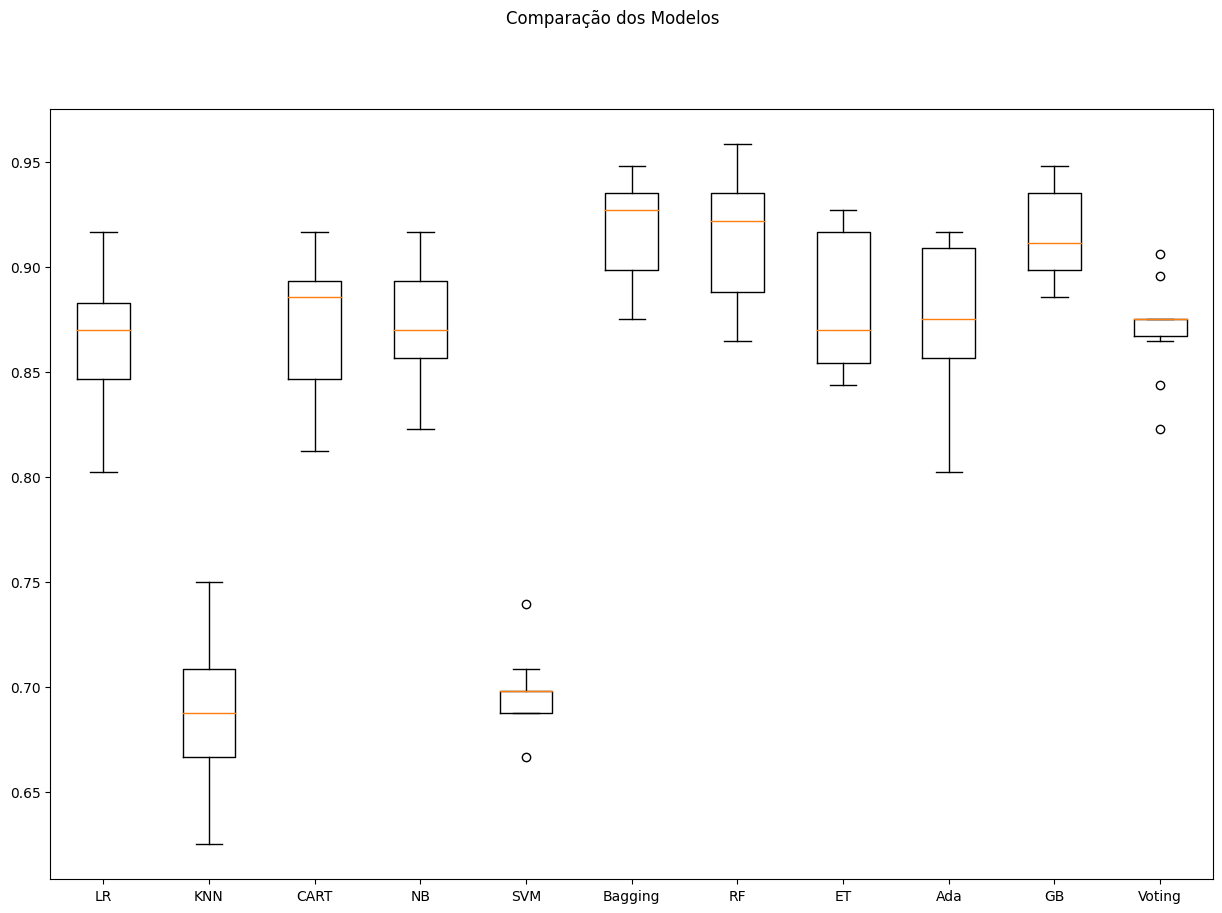

In [ ]:
# Criação e avaliação de modelos: linha base

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Modelos com dados padronizados ou normalizados


Cria-se pipelines para o treinamento de modelos utilizando técnicas de pre-processamentos como a padronização ou normalização dos dados.  
Em seguida é avaliado novamente o desempenho dos modelos comparando a linha de base com os que tiveram uma padronização dos dados e com aqueles que tiveram uma normalização.  

Alguns modelos apresentaram melhoras com a normalização e ou com a normalização. De uma forma geral os três melhores modelos com melhores resultados foram:

- BaggingClassifier
- RandomForestClassifier
- GradientBoostingClassifier



LR-orig: 0.864 (0.030)
KNN-orig: 0.686 (0.035)
CART-orig: 0.870 (0.033)
NB-orig: 0.872 (0.026)
SVM-orig: 0.697 (0.018)
Bag-orig: 0.918 (0.022)
RF-orig: 0.913 (0.029)
ET-orig: 0.882 (0.031)
Ada-orig: 0.874 (0.036)
GB-orig: 0.916 (0.020)
Vot-orig: 0.871 (0.022)
LR-padr: 0.865 (0.028)
KNN-padr: 0.838 (0.031)
CART-padr: 0.869 (0.033)
NB-padr: 0.872 (0.026)
SVM-padr: 0.881 (0.041)
Bag-padr: 0.914 (0.024)
RF-padr: 0.916 (0.031)
ET-padr: 0.881 (0.029)
Ada-padr: 0.874 (0.036)
GB-padr: 0.917 (0.020)
Vot-padr: 0.895 (0.033)
LR-norm: 0.866 (0.023)
KNN-norm: 0.850 (0.045)
CART-norm: 0.870 (0.030)
NB-norm: 0.872 (0.026)
SVM-norm: 0.878 (0.038)
Bag-norm: 0.914 (0.021)
RF-norm: 0.915 (0.034)
ET-norm: 0.883 (0.022)
Ada-norm: 0.874 (0.036)
GB-norm: 0.916 (0.020)
Vot-norm: 0.896 (0.029)


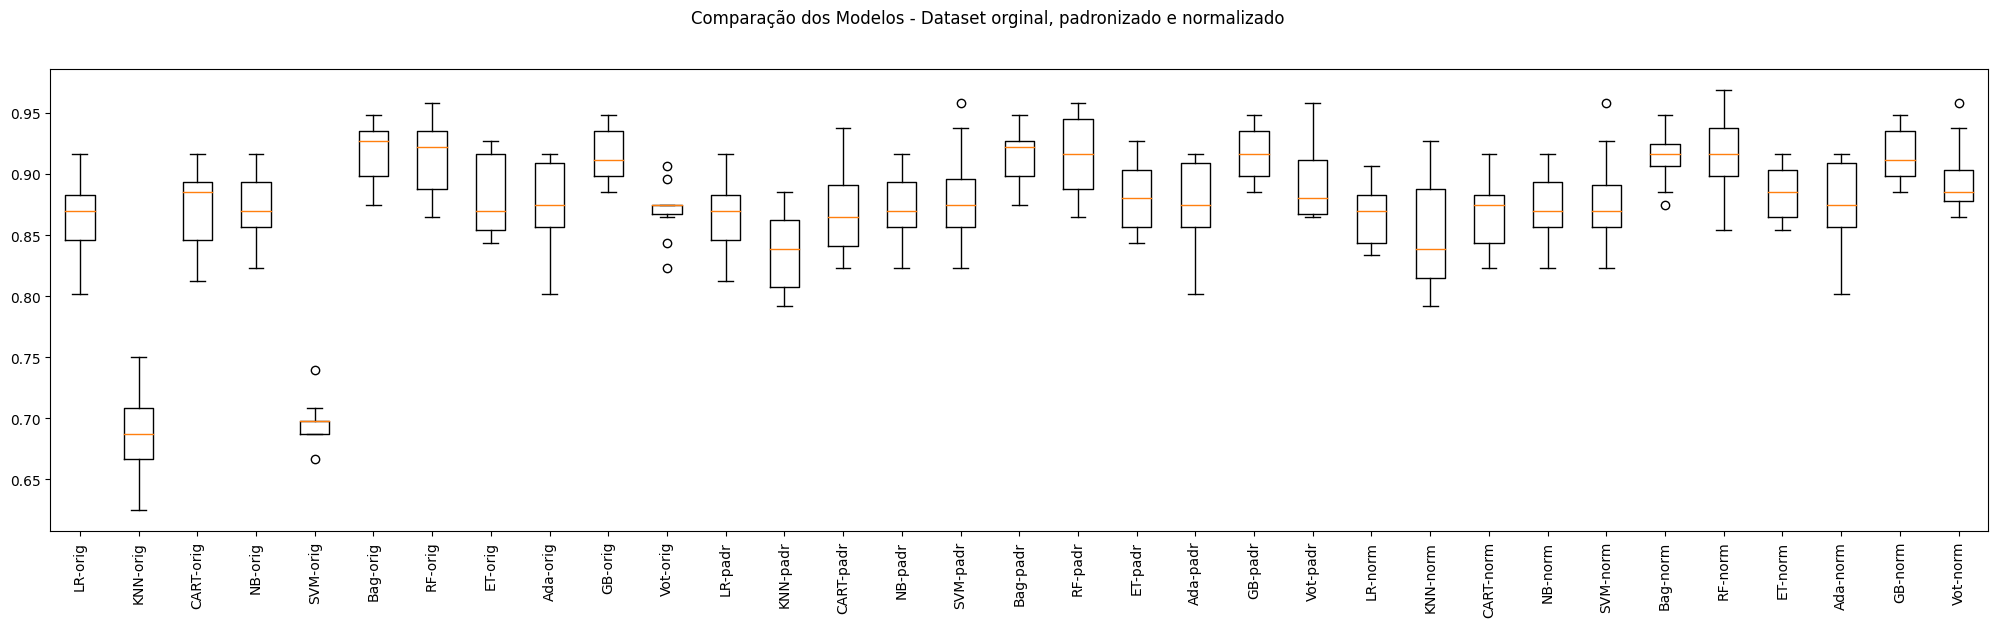

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline
# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Modelos com otimização de hiperparâmetros


Em uma última avaliação, utilizamos o Grid Search para buscarmos os melhores hiperparâmetros de cada modelo, tanto com padronização e com normalização.

In [ ]:
# Otimização dos hiperparâmetros

np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

# Cerca de 1h para executar essa célula

Modelo: LR-orig - Melhor: 0.866667 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.870833 usando {'LR__C': 0.1, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.871875 usando {'LR__C': 1, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.720833 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Modelo: KNN-padr - Melhor: 0.857292 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Modelo: KNN-norm - Melhor: 0.847917 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Modelo: CART-orig - Melhor: 0.891667 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 10}
Modelo: CART-padr - Melhor: 0.890625 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
Modelo: CART-norm - Melhor: 0.891667 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 10}
Modelo: NB-orig - Melhor: 0.868750 usando {'NB__var_smoothing': 1e-05}
Modelo: NB-padr - Me

## Resultado da avaliação com otimização de hiperparâmetros

Devido ao tempo de execução do GridSearch em cerca de 1h, reproduz-se aqui o resultado obtido para conferência.  
```
Modelo: LR-orig - Melhor: 0.866667 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.870833 usando {'LR__C': 0.1, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.871875 usando {'LR__C': 1, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.720833 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Modelo: KNN-padr - Melhor: 0.857292 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Modelo: KNN-norm - Melhor: 0.847917 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Modelo: CART-orig - Melhor: 0.891667 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 10}
Modelo: CART-padr - Melhor: 0.890625 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
Modelo: CART-norm - Melhor: 0.891667 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 10}
Modelo: NB-orig - Melhor: 0.868750 usando {'NB__var_smoothing': 1e-05}
Modelo: NB-padr - Melhor: 0.867708 usando {'NB__var_smoothing': 1e-09}
Modelo: NB-norm - Melhor: 0.867708 usando {'NB__var_smoothing': 1e-09}
Modelo: SVM-orig - Melhor: 0.863542 usando {'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
Modelo: SVM-padr - Melhor: 0.879167 usando {'SVM__C': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
Modelo: SVM-norm - Melhor: 0.873958 usando {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
Modelo: Bagging-orig - Melhor: 0.894792 usando {}
Modelo: Bagging-padr - Melhor: 0.901042 usando {}
Modelo: Bagging-norm - Melhor: 0.898958 usando {}
Modelo: RF-orig - Melhor: 0.910417 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 50}
Modelo: RF-padr - Melhor: 0.912500 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
Modelo: RF-norm - Melhor: 0.915625 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 50}
Modelo: ET-orig - Melhor: 0.892708 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 50}
Modelo: ET-padr - Melhor: 0.892708 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 50}
Modelo: ET-norm - Melhor: 0.894792 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 50}
Modelo: Ada-orig - Melhor: 0.917708 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 10}
Modelo: Ada-padr - Melhor: 0.917708 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 10}
Modelo: Ada-norm - Melhor: 0.917708 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 10}
Modelo: GB-orig - Melhor: 0.919792 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 100}
Modelo: GB-padr - Melhor: 0.919792 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 100}
Modelo: GB-norm - Melhor: 0.919792 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 100}
Modelo: Voting-orig - Melhor: 0.868750 usando {}
Modelo: Voting-padr - Melhor: 0.893750 usando {}
Modelo: Voting-norm - Melhor: 0.889583 usando {}
```

## Avaliação do modelo com o conjunto de teste

Melhor modelo pelo resultado da avaliação com otimização de hiperparâmetros  
```
Modelo: GB-padr - Melhor: 0.919792 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 100}
```

Apesar de apresentarem o mesmo resultado, tanto para sem o preprocessamento ou com a padronização ou a normalização, o Gadrient Booster com dados padronizados apresentou um melhor resultado na avaliação sem a otimização de hiperparâmetro. Sendo esse o motivo da minha escolha.



Aqui é treinado o modelo com os parâmetros escolhidos. Em seguida é realizado o teste com o holdout e avaliado o resultado a acurácia obtida.

In [ ]:
# Avaliação do modelo com o conjunto de testes

np.random.seed(7)

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)

print(accuracy_score(y_test, predictions))

0.9041666666666667


## Pipeline do modelo com os hiperparâmetros otimizados


Realiza a mesma avaliação anterior utilizando uma pipeline para padronizar os dados automaticamente. Acrescenta os resultados de Recall Precision e F Score para análise.

In [26]:
# Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados

np.random.seed(7)

model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

pipeline = Pipeline(steps=[('StandardScaler', StandardScaler()), ('GB', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(f1_score(y_test, predictions))

0.9041666666666667
0.8648648648648649
0.8311688311688312
0.847682119205298


## Analisar outros modelos para comparação

Ao analisar as métricas de outros modelos confirmo a escolha do gradient booster por ter uma melhor consistência nas diferentes métricas, principalmente na precisão e F score, assim como na acurácia.:

In [31]:
np.random.seed(7)


# Analise Bagging Classifier -> Modelo: Bagging-padr - Melhor: 0.901042 usando {}
model_bagg = BaggingClassifier()
pipeline_bagg = Pipeline(steps=[('StandardScaler', StandardScaler()), ('Bagg', model_bagg)])
pipeline_bagg.fit(X_train, y_train)

predictions_bagg = pipeline_bagg.predict(X_test)
print("-------------------")
print(accuracy_score(y_test, predictions_bagg), "BAGG-orig Accuracy")
print(recall_score(y_test, predictions_bagg), "BAGG-orig Recall")
print(precision_score(y_test, predictions_bagg), "BAGG-orig Precision")
print(f1_score(y_test, predictions_bagg), "BAGG-orig F1")


# Analise Random Forest Classifier ->  Modelo: RF-norm - Melhor: 0.915625 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 50}
model_rf = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=50)
pipeline_rf = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model_rf)])
pipeline_rf.fit(X_train, y_train)

predictions_rf = pipeline_rf.predict(X_test)
print("-------------------")
print(accuracy_score(y_test, predictions_rf), "RF-norm Accuracy")
print(recall_score(y_test, predictions_rf), "RF-norm Recall")
print(precision_score(y_test, predictions_rf), "RF-norm Precision")
print(f1_score(y_test, predictions_rf), "RF-norm F1")


# Analise Ada Boost Classifier -> Modelo: Ada-orig - Melhor: 0.917708 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 10}
model_ada = AdaBoostClassifier(learning_rate=1, n_estimators=10)
model_ada.fit(X_train, y_train)

predictions_ada = model.predict(X_test)
print("-------------------")
print(accuracy_score(y_test, predictions_ada), "ADA-orig Accuracy")
print(recall_score(y_test, predictions_ada), "ADA-orig Recall")
print(precision_score(y_test, predictions_ada), "ADA-orig Precision")
print(f1_score(y_test, predictions_ada), "ADA-orig F1")


# Analise Decision Tree Classifier -> Modelo: CART-norm - Melhor: 0.891667 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 10}
model_cart = DecisionTreeClassifier(min_samples_leaf=4, min_samples_split= 10)
pipeline_cart = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('CART', model_cart)])
pipeline_cart.fit(X_train, y_train)

predictions_cart = pipeline_cart.predict(X_test)
print("-------------------")
print(accuracy_score(y_test, predictions_cart), "CART Accuracy")
print(recall_score(y_test, predictions_cart), "CART Recall")
print(precision_score(y_test, predictions_cart), "CART Precision")
print(f1_score(y_test, predictions_cart), "CART F1")



-------------------
0.9 BAGG-orig Accuracy
0.8513513513513513 BAGG-orig Recall
0.8289473684210527 BAGG-orig Precision
0.84 BAGG-orig F1
-------------------
0.8958333333333334 RF-norm Accuracy
0.8378378378378378 RF-norm Recall
0.8266666666666667 RF-norm Precision
0.8322147651006712 RF-norm F1
-------------------
0.30833333333333335 ADA-orig Accuracy
1.0 ADA-orig Recall
0.30833333333333335 ADA-orig Precision
0.4713375796178344 ADA-orig F1
-------------------
0.8791666666666667 CART Accuracy
0.7702702702702703 CART Recall
0.8260869565217391 CART Precision
0.7972027972027972 CART F1


## Prepara os arquivos para o export

Aqui é preparado os arquivos tanto do Modelo e do padronizador separadamente, quanto uma pipeline contendo o modelo e padronizador. Podendo assim utilizar tanto a pipeline quanto o modelo separadamente.

São preparados os arquivos:  
- Modelo escolhido com hiperparâmetros otimizados - `hr_recruitment_classifier.pkl`  
- Padronizador utilizado - `standard_scaler_recruitment.pkl`  
- Pipeline contendo o modelo e o padronizador - `hr_recruitment_pipeline.pkl`  
  

In [ ]:
# Salvando os arquivos

# Salvando o modelo
model_filename = 'hr_recruitment_GBclassifier.pkl'
with open("./"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'standard_scaler_recruitment.pkl'
with open("./"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'hr_recruitment_GBpipeline.pkl'
with open("./"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)


## Export pipelines extras para teste no Back-end do sistema


Para a realização de alguns testes no Back-end do sistema aqui exportamos outro modelo para a comparação no teste.  
Foi escolhido o Random Forest por apresenteram resultados próximos ao Gradient Booster e por tanto podendo ser usado de igual forma.

In [32]:
# Pipeline criada para teste em Back-end

# Modelo escolhido
# Modelo: RF-norm - Melhor: 0.915625 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 50}

# Prepara arquivos para o export
pipeline_filename_rf = 'hr_recruitment_pipeline_test_randomForrest.pkl'

with open("./"+pipeline_filename_rf, 'wb') as file:
    pickle.dump(pipeline_rf, file)


## Export dos arquivos

Os arquivos são salvos no sistema local.

In [33]:
from google.colab import files

files.download("./hr_recruitment_GBclassifier.pkl")
files.download("./hr_recruitment_GBpipeline.pkl")
files.download("./standard_scaler_recruitment.pkl")
files.download("./golden_dataset_hr_recruitment.csv")
files.download("./hr_recruitment_pipeline_test_randomForrest.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusão

Ao longo das avaliações, pude perceber que os três melhores modelos seguiram próximos em todas as etápas. Na avaliação de modelo de base, na avaliação com preprocessamento e na avaliação com otimização de hiperparâmetros. Procurei definir o modelo final com base no desempenho em todas essas avaliações.

A pipeline com o Random Forest será utilizada apenas em teste automatizado no back-end.

Em uma observação final, destaco que inicialmente fiz o treinamento do modelo com a totalidade do dataset original, apenas separando a parte de treino e teste. Sem separar um parte para um Golden dataset. Ao fazer essa separação, e por consequencia trabalhar com um número menor de entradas, pude perceber uma alteração dos resultados das avaliaçõe de cada modelo. E apesar de o Gradient Booster e o Random Forest seguiram respectivamente em primeiro e segundo lugar, o terceiro melhor modelo variou. Todas as variações são pequenas e não apresentam qualquer problema ao modelo ou ao dataset utilizado. Foi apenas uma reflexão sobre a importância do tamanho do dataset para o treinamento de modelos.


## Especificações Modelo Final

- Modelo de Base: **Gradient Booster**
- Pré-processamento: **Standard Scaler**
- Hiperparâmetros: **learning_rate=0.1, max_depth=3, n_estimators=100**
